['model_120000_steps.zip', 'model_240000_steps.zip']
model_240000_steps.zip


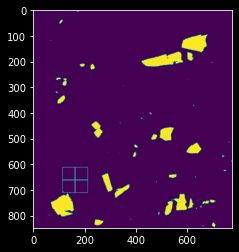

In [39]:
# Loading a saved model
import gym
import src
import os
import numpy as np
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.evaluation import evaluate_policy
import matplotlib.pyplot as plt
plt.style.use('dark_background')

run_id = '20220523_1'
path = 'data/'+run_id+'/'

image = np.load('images/set2/set2_image1.npy')

files = [f for f in os.listdir(path) if f[-4:] == '.zip']
files = sorted(files)
file = files[-1]
print(files)
print(file)
model = DQN.load(path+file)
env = src.XtalEnv(images=[image], save_replay=True)
env.reset(start_full_image=False)

subwindow = env.window.subwindows[-1]
lined_image = env.window.draw_lines(image.copy(), [i for i in range(len(env.window.subwindows)-1)])
plt.imshow(lined_image)

# mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=10)
# print(mean_reward, std_reward)

In [1]:
# Running a test run
total_steps = 200
actions = []
rewards = []
num_polygons = []
pixel_ratios = []

obs = env.reset(start_full_image=False)
for i in range(total_steps):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, _ = env.step(int(action))
    num_polygons.append(env.window.subwindows[-1]['enclosed']['num_polygons'])
    pixel_ratios.append(env.window.subwindows[-1]['enclosed']['pixel_ratio'])
    if done: break
    
    actions.append(int(action))
    rewards.append(reward)
    
    
#  Displaying the results
import matplotlib.pyplot as plt
from matplotlib import animation

def draw_lines(original_image, coordinates):
    image = original_image.copy()
    val = 1
    
    for x in range(coordinates[2], coordinates[3]):
        image[coordinates[0]][x] = val
        image[coordinates[1]-1][x] = val
    for y in range(coordinates[0], coordinates[1]):
        image[y][coordinates[2]] = val
        image[y][coordinates[3]-1] = val
    
    return image

replays = env.replay
fig = plt.figure()
ax = plt.gca()
im = plt.imshow(draw_lines(image, replays[0]))

def updatefig(i):
    image_mod = draw_lines(image, replays[i])
    im.set_array(image_mod)

    return im

ani = animation.FuncAnimation(fig, updatefig, interval=20, frames=len(actions))


NameError: name 'env' is not defined

In [2]:
# Displaying frame by frame
for i, coordinates in enumerate(env.replay):
    print(coordinates,
          src.config.ACTION_CODE[actions[i]][1],
          rewards[i],
          num_polygons[i],
          pixel_ratios[i]
          
         )
    image_mod = draw_lines(image, coordinates)
    plt.imshow(image_mod)
    plt.show()

NameError: name 'env' is not defined